<a href="https://colab.research.google.com/github/gnbhub/gnbai2020w/blob/main/week2/2%EC%A3%BC%EC%B0%A8_%EC%84%B1%EC%9E%90%EB%AF%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

california housing:Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import norm, probplot, skew
from IPython.display import display

from sklearn.preprocessing import StandardScaler

##Load Data

In [2]:
train_df = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [10]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [11]:
train_df.describe()
#전체 데이터에 대한 요약값

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##Distribution of training data

In [12]:
feature = train_df.columns.values.tolist()

In [13]:
for i, feature in enumerate(feature):
   print(i, feature)

0 longitude
1 latitude
2 housing_median_age
3 total_rooms
4 total_bedrooms
5 population
6 households
7 median_income
8 median_house_value


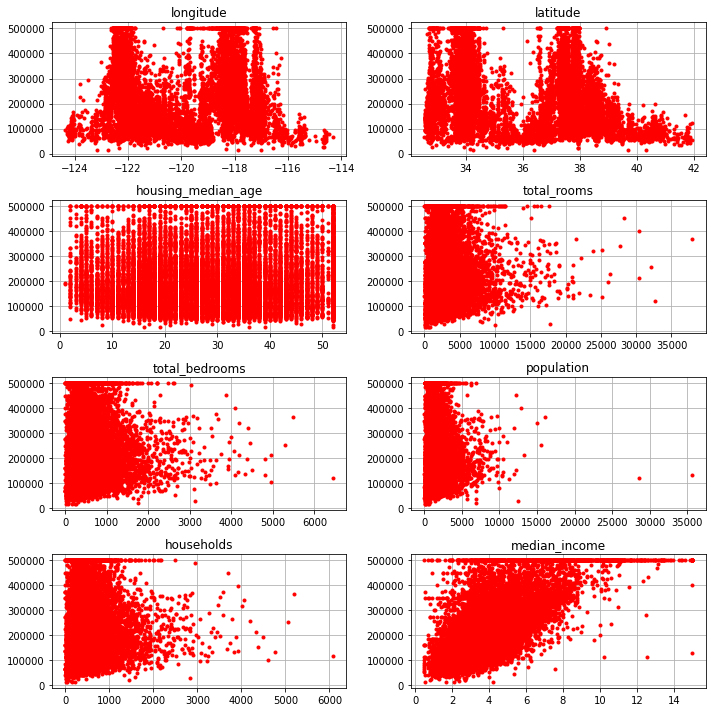

In [14]:
def plot_df(df):
    features = df.columns.values.tolist()
    target = features.pop()

    plt.figure(figsize=(10,10))
    for i, feature in enumerate(features):
        plt.subplot(4, 2, i+1)
        plt.grid()
        plt.plot(df[feature], df[target], 'r.')
        plt.title(feature)
    plt.tight_layout()
    plt.show()
    plt.close()

plot_df(train_df)

In [15]:
train_df['population'] >= 20000

0        False
1        False
2        False
3        False
4        False
         ...  
16995    False
16996    False
16997    False
16998    False
16999    False
Name: population, Length: 17000, dtype: bool

In [16]:
train_df[train_df['population'] >= 20000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2274,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0
12772,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0


In [17]:
train_df[train_df['population'] >= 20000].index

Int64Index([2274, 12772], dtype='int64')

In [18]:
#treating outliers(이상값)

train_df = train_df.drop(train_df[train_df['population'] >= 20000].index)

In [19]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


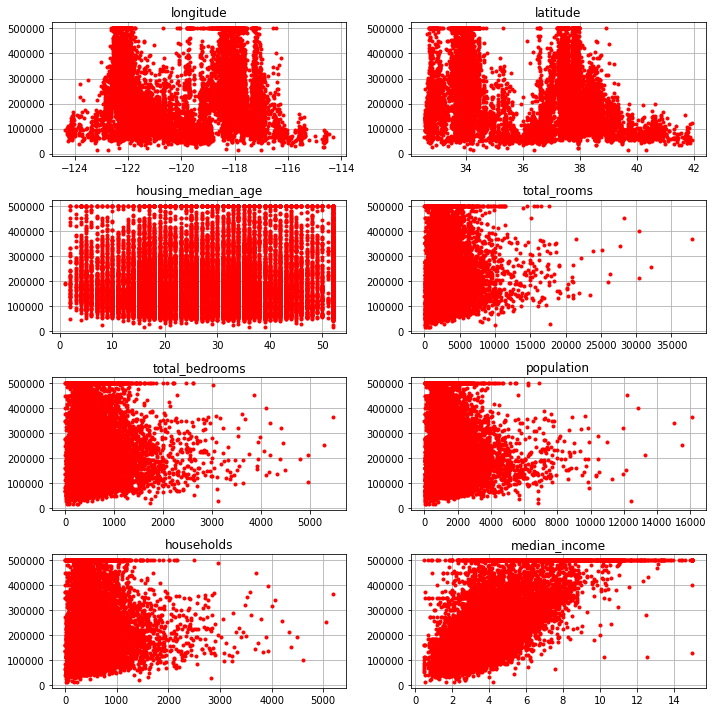

In [20]:
plot_df(train_df)

#Target variable analysis

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


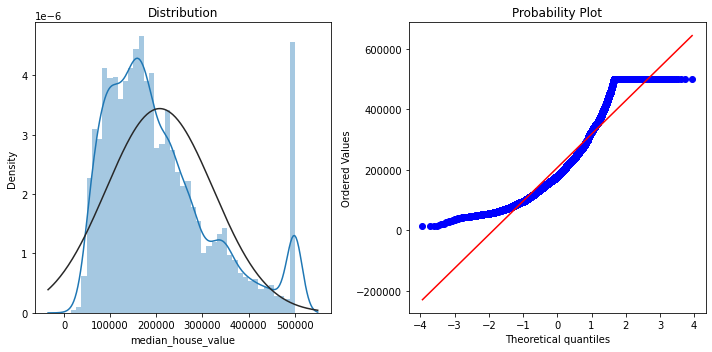

In [21]:
def plot_hist_prob(df, feature):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)

    #plot histogram
    sns.distplot(df[feature], fit=norm)
    plt.title('Distribution')
    plt.subplot(1, 2, 2)
    probplot(df[feature], plot=plt)

    plt.tight_layout()
    plt.show()
    plt.close()

target = 'median_house_value'
plot_hist_prob(train_df, target)

In [22]:
# log-transformation
# log(1+x)
train_df[target] = np.log1p(train_df[target])


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


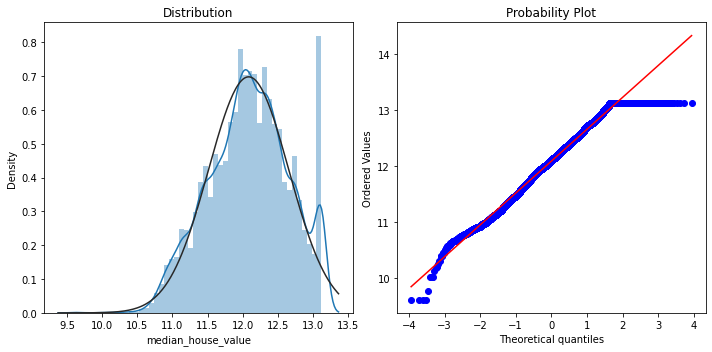

In [23]:
plot_hist_prob(train_df, target)

##Feature engineering

In [24]:
full_df = pd.concat([
    train_df.drop(target, axis=1),
    test_df.drop(target, axis=1)
])

full_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [25]:
# skewness

def print_skewness():
    feats = full_df.columns.values.tolist()
    skewed_feats = full_df[feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    display(skewed_feats)

print_skewness()

total_rooms           3.930562
total_bedrooms        3.286475
households            3.231976
population            3.226013
median_income         1.636937
latitude              0.469927
housing_median_age    0.057776
longitude            -0.303023
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


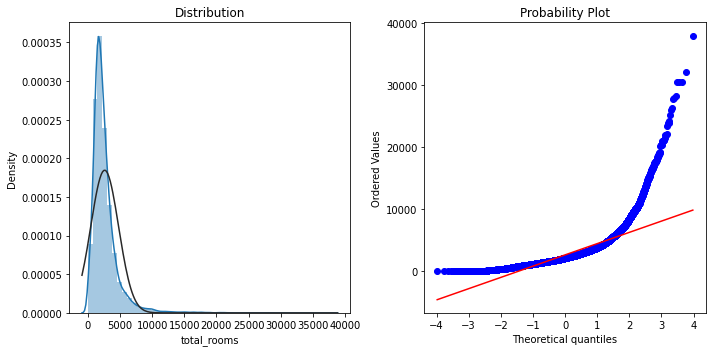

In [26]:
plot_hist_prob(full_df, 'total_rooms')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


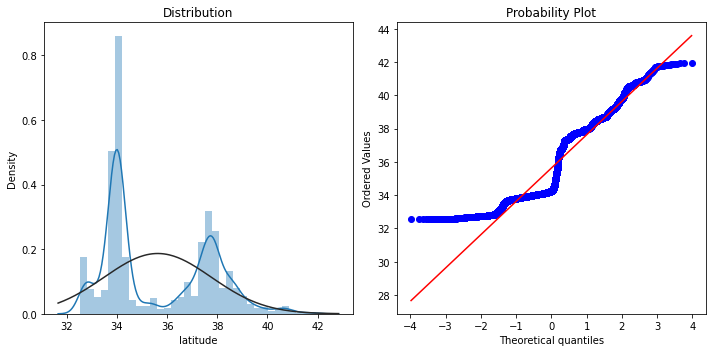

In [27]:
plot_hist_prob(full_df, 'latitude')

In [28]:
full_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708


In [43]:
#boxcox transformation

def fixing_skewness():
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax

    feats = full_df.columns.values.tolist()
    skewed_feats = full_df[feats].apply(lambda x: skew(x)).sort_values(ascending=False)

    high_skew = skewed_feats[skewed_feats > 1]

    for feat in high_skew.index:
        full_df[feat] = boxcox1p(full_df[feat], boxcox_normmax(full_df[feat]+1))

fixing_skewness()
  

In [42]:
scaler = StandardScaler()
full_df.loc[:] = scaler.fit_transform(full_df)

full_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2.623441,-0.672627,-1.083286,1.480233,1.706900,-0.230818,0.169856,-1.758411
1,2.543582,-0.574318,-0.765359,2.035311,2.455572,-0.081288,0.141070,-1.374958
2,2.498662,-0.906696,-0.924322,-1.389630,-1.237611,-1.587739,-1.605496,-1.566545
3,2.493671,-0.930103,-1.162768,-0.506335,-0.403595,-1.099522,-0.841668,-0.201552
4,2.493671,-0.962872,-0.685877,-0.547580,-0.448455,-0.867840,-0.652776,-1.262803
...,...,...,...,...,...,...,...,...
2995,-0.146656,-0.564955,-0.447432,-0.551138,0.536354,0.074641,0.558447,-2.189780
2996,0.711824,-0.733485,-0.129505,1.367837,1.402049,1.764454,1.466261,-0.070280
2997,-0.066798,0.315145,-1.480695,-1.065373,-1.065954,-0.736703,-0.875335,-0.907996
2998,1.220923,-0.714759,0.903758,-3.195765,-3.473485,-3.256939,-3.363461,-0.148469


In [44]:
x_train = full_df[:len(train_df)]
x_test = full_df[len(train_df):]

train_df = pd.concat([x_train, train_df[target]], axis=1)
test_df = pd.concat([x_test, test_df[target]], axis = 1)

del x_train, x_test

##AutoML with Pycaret

In [8]:
!pip install pycaret

In [9]:
from pycaret.utils import enable_colab, check_metric
from pycaret.regression import *

In [10]:
enable_colab()

Colab mode enabled.


In [11]:
train_df

NameError: ignored

In [ ]:
reg = setup(data=train_df , target='median_house_value')

In [ ]:
best_3 = compare_models(n_select=3)

In [12]:
best_3

NameError: ignored

In [ ]:
blended = blend_models(estimator_list=best_3, fold=3)

In [13]:
pred = predict_model(blended)

NameError: ignored

In [ ]:
final_model = finalize_model(blended)

In [14]:
predictions = predict_model(final_model, data=test_df)

NameError: ignored

In [ ]:
predictions.head()

In [ ]:
check_metric(predictions['median_house_value'], np.expm1(predictions['Label']), 'R2')

In [ ]:
plot_model(final_model)